In [36]:
import os
import subprocess
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colors as mlp_colors
import random


In [24]:
# same function from HW3 to download files
group_num = 9
def download_files(group_num, folders = None, redownload = False):
    node_names = {}
    root_folder = f"Group{group_num}"
    root_folder_exist = os.path.exists(root_folder)
    if (not root_folder_exist) or redownload:
        os.system(f"rm -rf {root_folder}")
        os.mkdir(root_folder)
        if folders is None:
            folders = ['Facebook-Ego', 'Twitter-Ego']
        for folder in folders:
            os.mkdir(os.path.join(root_folder, folder))
            res = subprocess.run(["curl", "-s", f"https://api.github.com/repos/1250326/exercise_complex_network/contents/Datasets/Group{group_num}/{folder}"], stdout=subprocess.PIPE)
            for file_info in json.loads(res.stdout):
                os.system(f"wget -O {os.path.join(root_folder, folder, (fname:=file_info['name']))} {file_info['download_url']} -q")
                print(f"Downloaded file: {fname}")
                # if '.' in fname:
                    # node_names[folder.split('-')[0]] = fname.split('.')[0]
            print(f"Downloaded folder: {folder}")
    
        
    for folder in os.listdir(root_folder):
        for file in os.listdir(os.path.join(root_folder, folder)):
            if '.' in file:
                node_names[folder.split('-')[0]] = file.split('.')[0]
    return node_names

node_names = download_files(group_num, redownload=False)
node_names

{'Facebook': '3437_2', 'Twitter': '6408382'}

# Question (a): Subgraph of Ten Nodes
Select ten nodes from either dataset and create a subgraph view. Here's an example for facebook_net:

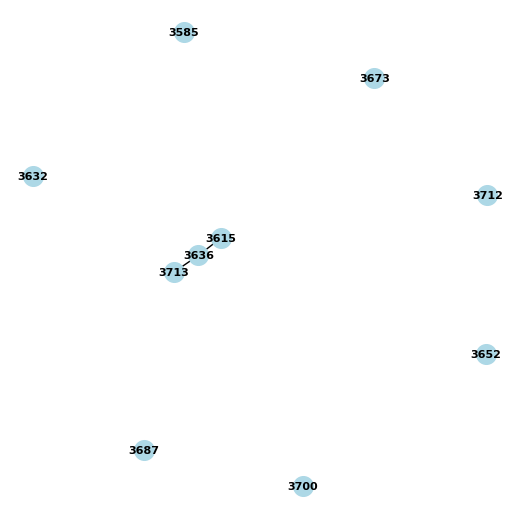

In [25]:
facebook_net = nx.read_edgelist(f"Group{group_num}/Facebook-Ego/{node_names['Facebook']}.edges")

random.seed(9)
subgraph_rand = random.sample(list(facebook_net.nodes), 10)
plt.figure(figsize=(5, 5))
nx.draw(facebook_net.subgraph(subgraph_rand), with_labels=True, node_color='lightblue', font_size=8, font_weight='bold', node_size=200, pos=nx.spring_layout(facebook.subgraph(subgraph_rand)))

# Question (b): Listing Three Community Detection Algorithms

Common community detection algorithms include:

1. Louvain algorithm
2. Divisive hierarchical clustering (Girvan & Newman)
3. Label Propagation Algorithm (propagates labels until convergence)


# Question (c): Detecting and Plotting Communities

For this, you can apply these algorithms on the chosen dataset, such as facebook_net:

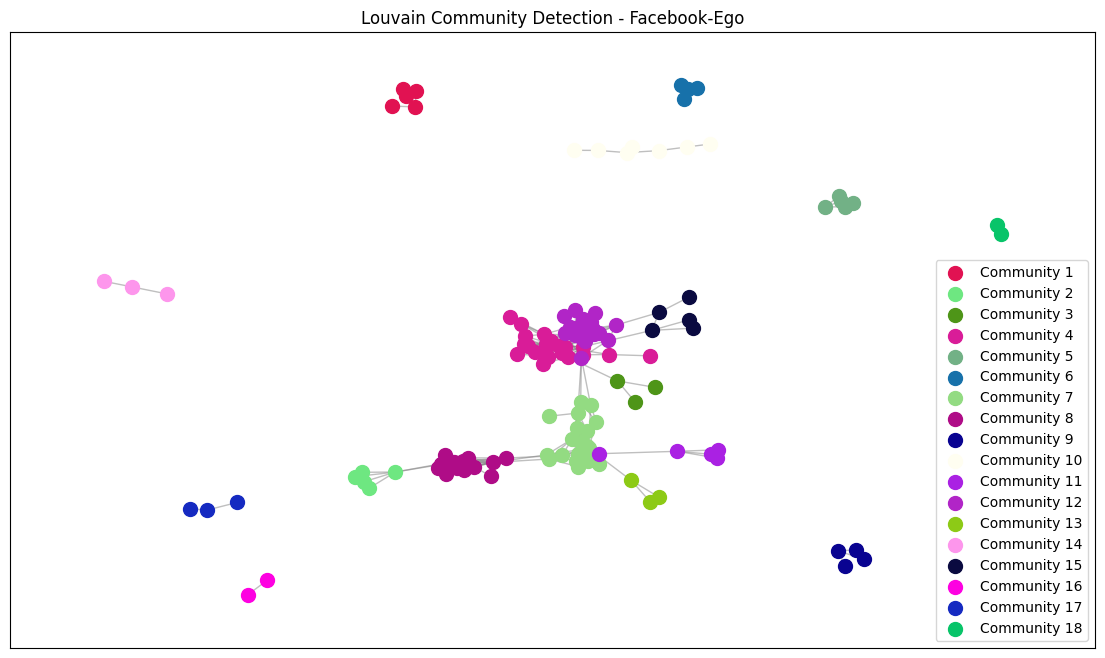

In [42]:
louvain_communities_list = nx.community.louvain_communities(facebook_net)

pos = nx.spring_layout(facebook_net, seed=18)
plt.figure(figsize=(14, 8))

random.seed(9)
colors = [mlp_colors.to_hex(np.random.rand(3)) for _ in range(len(louvain_communities_list))]

for i, community in enumerate(louvain_communities_list, start=1):
    nx.draw_networkx_nodes(facebook_net, pos, nodelist=list(community), node_color=colors[i-1], label=f"Community {i}", node_size=100)

nx.draw_networkx_edges(facebook_net, pos, alpha=0.5, edge_color="gray")
plt.title("Louvain Community Detection - Facebook-Ego")
plt.legend()
plt.show()

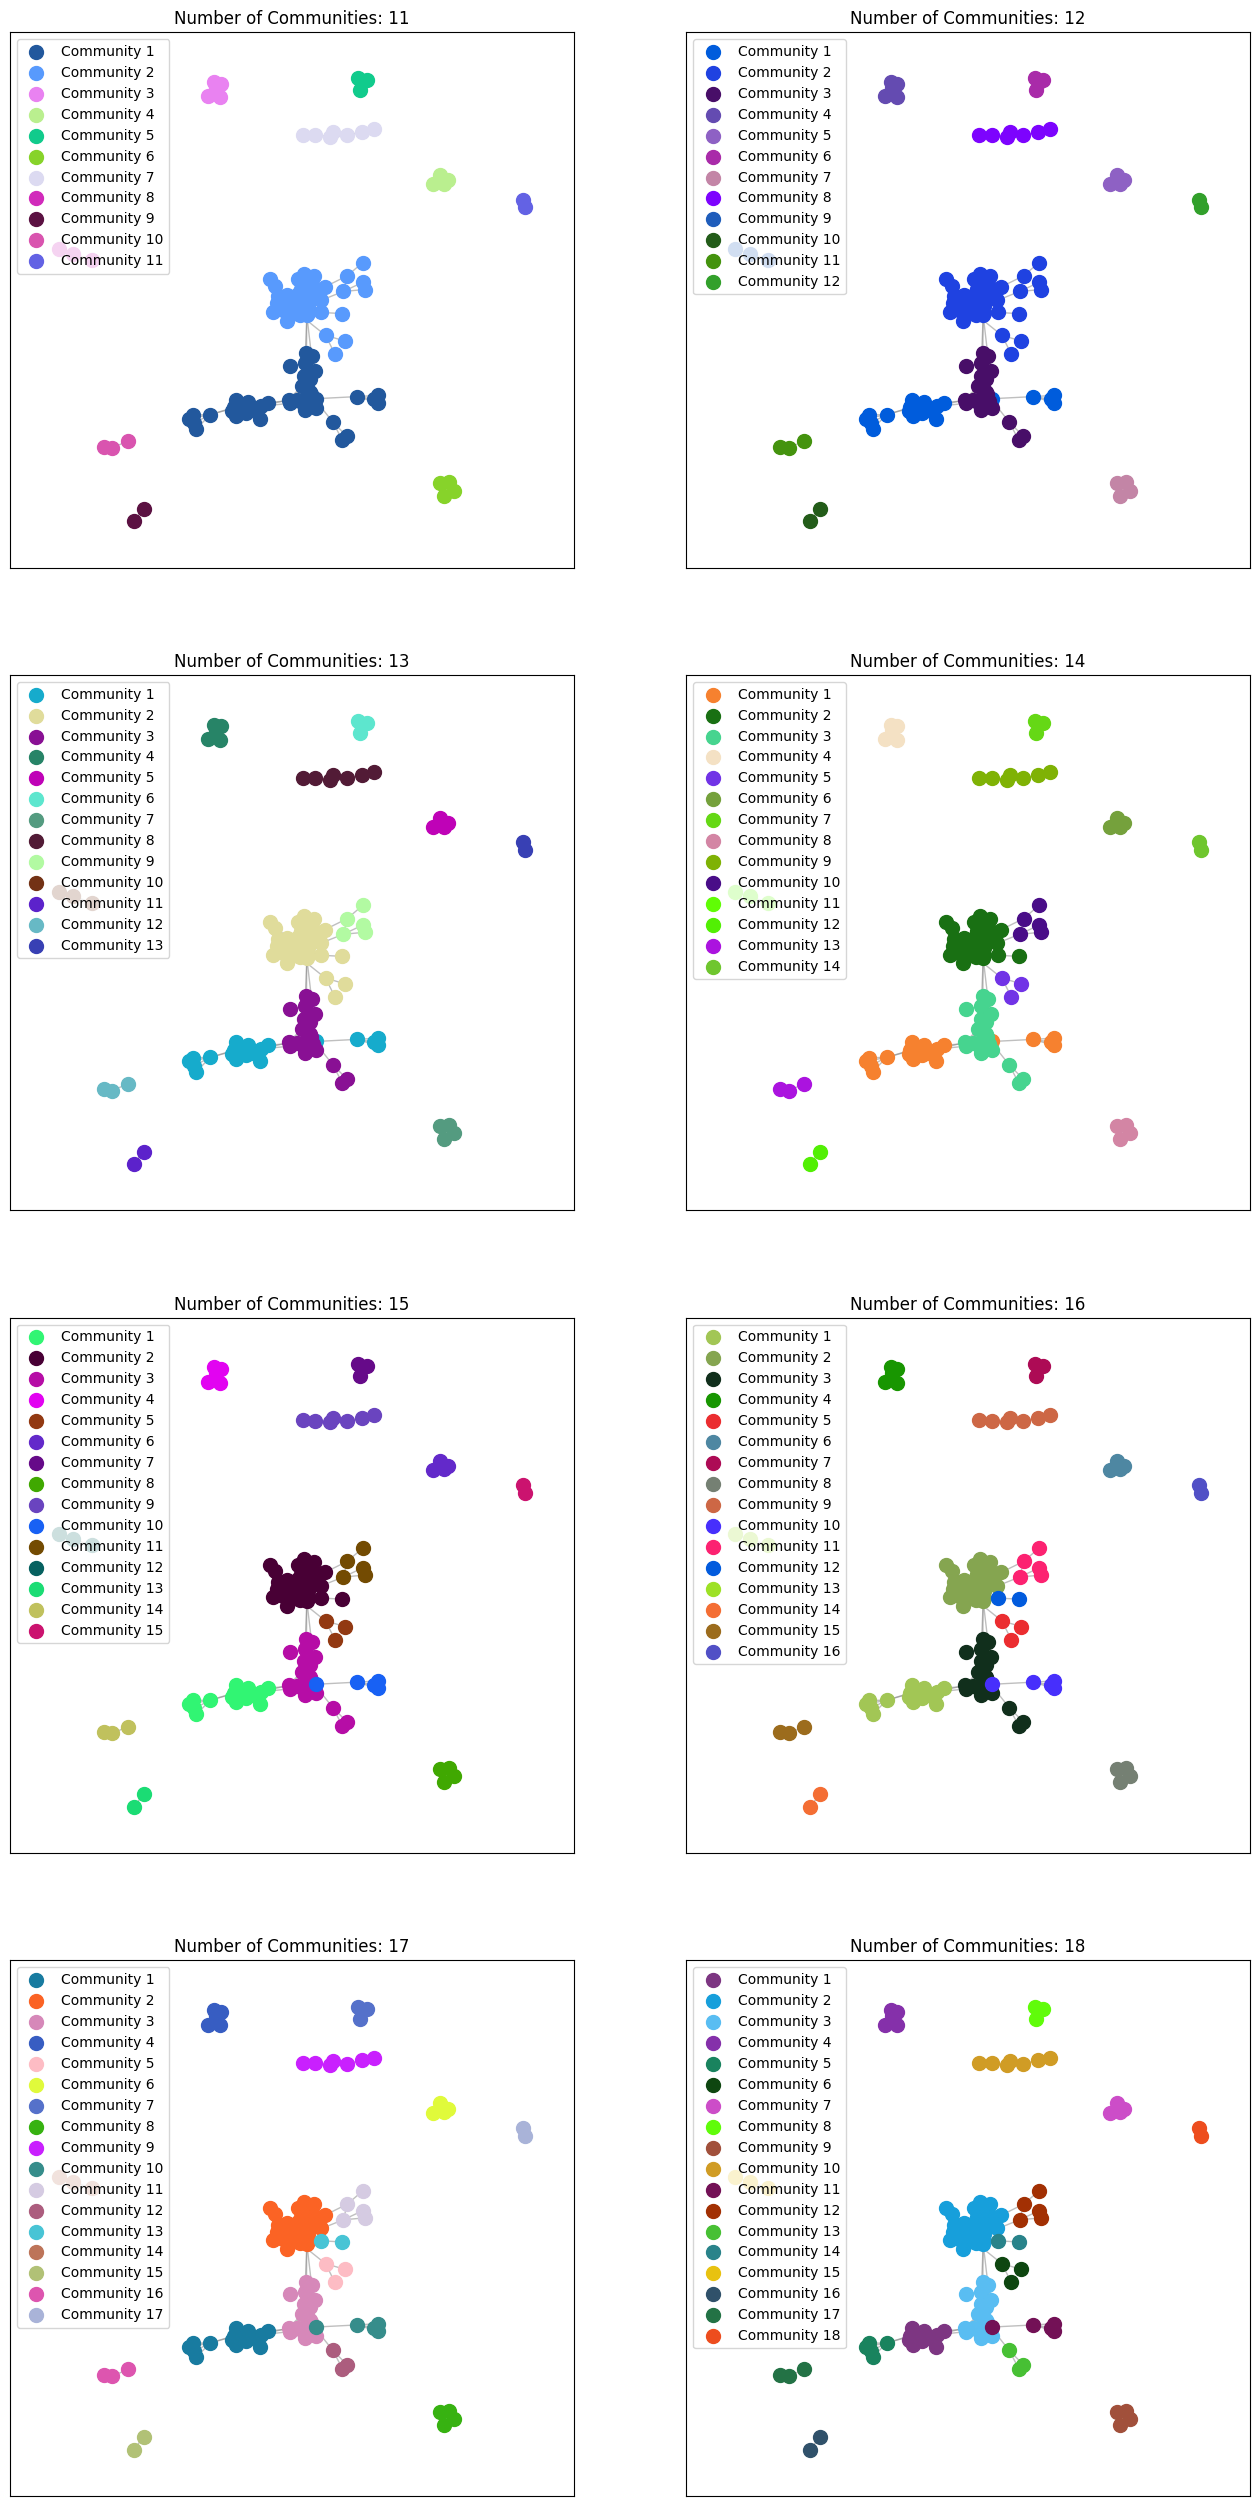

In [55]:
girvan_communities_generator = nx.community.girvan_newman(facebook_net)
n_iter = (4,2)
# there is 122 iterations, let's just show the first n_iter[0]*n_iter[1] iterations

fig, axes = plt.subplots(*n_iter, figsize=(n_iter[1]*8, n_iter[0]*8))
axes = axes.flatten()

for ax, partition in zip(axes, girvan_communities_generator):
    pos = nx.spring_layout(facebook_net, seed=18)

    colors = [mlp_colors.to_hex(np.random.rand(3)) for _ in range(len(partition))]

    for i, community in enumerate(partition):
        nx.draw_networkx_nodes(facebook_net, pos, nodelist=list(community), 
                            node_color=colors[i], label=f"Community {i+1}", 
                            node_size=100, ax=ax)

    nx.draw_networkx_edges(facebook_net, pos, alpha=0.5, edge_color="gray", ax=ax)
    ax.set_title(f"Number of Communities: {len(partition)}")
    ax.legend()


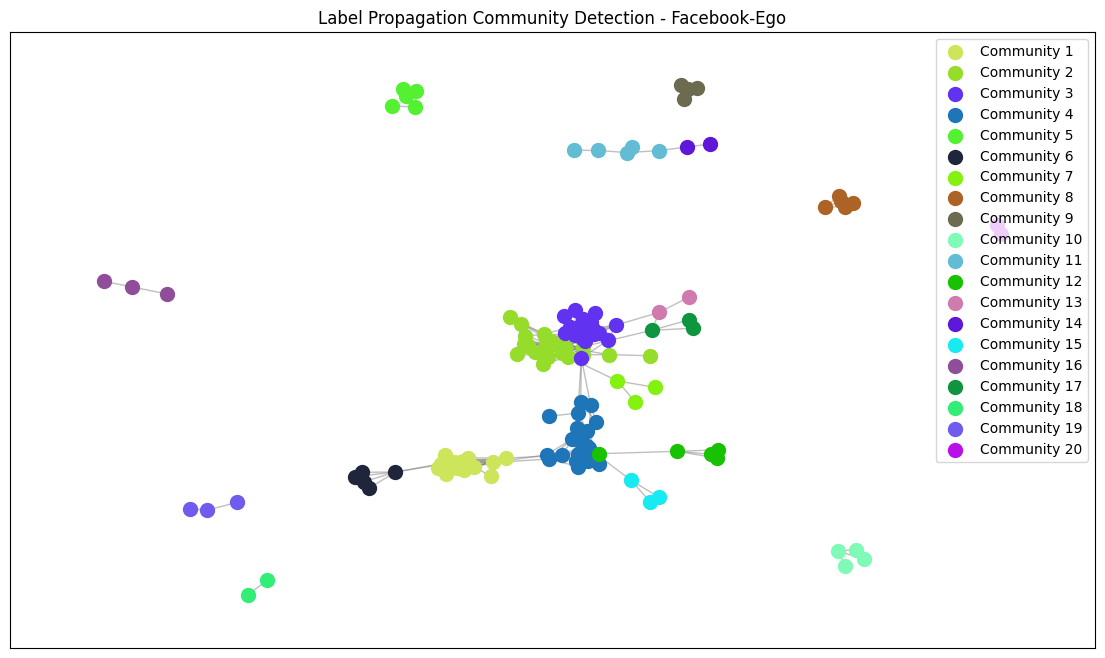

In [56]:
labels_propagation_communities = list(nx.community.label_propagation_communities(facebook_net))

pos = nx.spring_layout(facebook_net, seed=18)
plt.figure(figsize=(14, 8))

random.seed(9)
colors = [mlp_colors.to_hex(np.random.rand(3)) for _ in range(len(labels_propagation_communities))]
for i, community in enumerate(labels_propagation_communities, start=1):
    nx.draw_networkx_nodes(facebook_net, pos, nodelist=list(community), node_color=colors[i-1], label=f"Community {i}", node_size=100)

nx.draw_networkx_edges(facebook_net, pos, alpha=0.5, edge_color="gray")
plt.title("Label Propagation Community Detection - Facebook-Ego")
plt.legend()
plt.show()



# Question (d): Differences and Reasoning

The Louvain Algorithm, Girvan-Newman Algorithm, and Label Propagation Algorithm approach community detection using different principles. The **Louvain Algorithm** works by optimizing modularity through merging smaller communities into larger ones, making it efficient for large networks. In contrast, the **Girvan-Newman Algorithm** identifies communities by progressively removing edges with high betweenness, effectively dividing the network into smaller groups. This approach provides a clear hierarchical structure but becomes computationally expensive for larger graphs. Meanwhile, the **Label Propagation Algorithm** propagates labels across nodes based on their neighbors, resulting in fast and scalable community detection. However, it can produce varying results due to its inherent randomness.

These differences stem from the underlying methodologies and their sensitivity to network structures. Louvain’s modularity-based approach is ideal for detecting distinct communities but might merge smaller groups at higher resolutions. Girvan-Newman excels at highlighting hierarchical divisions but is limited by its computational demands. Label Propagation, while fast, may struggle with overlapping communities or weakly clustered networks. Overall, choosing an algorithm depends on the network size, desired community structure, and the need for hierarchical or flat clustering.